In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset1.zip to dataset1.zip


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!unzip -uq "/content/dataset1.zip" -d "/content/drive/My Drive/"

In [4]:
data_root = '/content/drive/My Drive/dataset1'

In [5]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
import numpy as np
from keras.optimizers import *
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [9]:
img_width, img_height = 150, 150
  
train_data_dir = '/content/drive/My Drive/dataset1/train'
validation_data_dir = '/content/drive/My Drive/dataset1/test'
train_samples = 880
validation_samples = 220
epochs = 10
batch_size = 10

In [10]:
from keras import backend as K 
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [11]:
train_datagen = ImageDataGenerator( 
                rotation_range=20.,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                vertical_flip=True) 
  
test_datagen = ImageDataGenerator(rescale = 1. / 255) 
  
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='categorical') 
  
validation_generator = test_datagen.flow_from_directory( 
                                    validation_data_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='categorical')

Found 2640 images belonging to 3 classes.
Found 660 images belonging to 3 classes.


In [12]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(3)) 
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
activation_1 (Activation)    (None, 149, 149, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 32)        4128      
_________________________________________________________________
activation_2 (Activation)    (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 35, 35, 64)       

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                   metrics=['categorical_accuracy'])

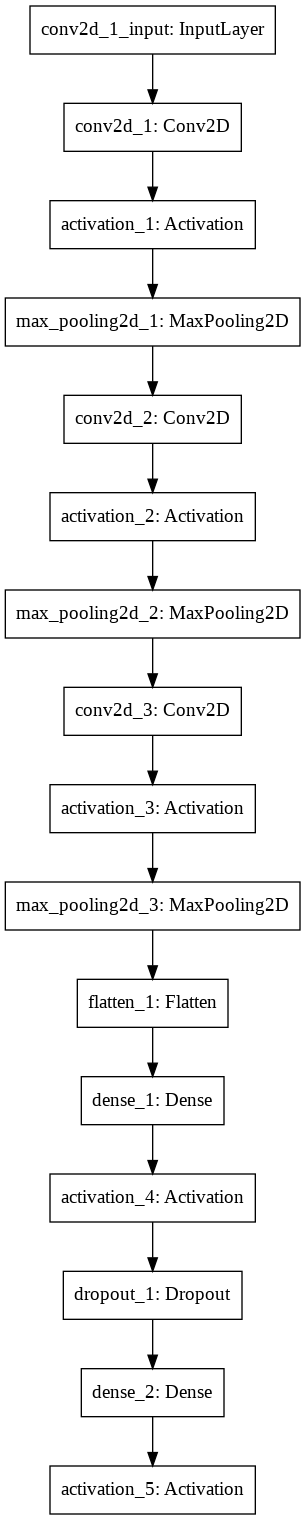

In [15]:
from keras.utils import plot_model
plot_model(model,to_file='model.png')

In [16]:
history=  model.fit_generator(train_generator, 
    steps_per_epoch = train_samples, 
    epochs = 20, 
    validation_data = validation_generator, 
    validation_steps = validation_samples) 

Epoch 1/20
880/880 [==============================] - 86s 98ms/step - loss: 3.0851 - categorical_accuracy: 0.3326 - val_loss: 1.0937 - val_categorical_accuracy: 0.3300
Epoch 2/20
880/880 [==============================] - 78s 89ms/step - loss: 1.0988 - categorical_accuracy: 0.3231 - val_loss: 1.0963 - val_categorical_accuracy: 0.3368
Epoch 3/20
880/880 [==============================] - 78s 88ms/step - loss: 1.0988 - categorical_accuracy: 0.3122 - val_loss: 1.0996 - val_categorical_accuracy: 0.3314
Epoch 4/20
880/880 [==============================] - 78s 89ms/step - loss: 1.0988 - categorical_accuracy: 0.3274 - val_loss: 1.0991 - val_categorical_accuracy: 0.3323
Epoch 5/20
880/880 [==============================] - 77s 88ms/step - loss: 1.0988 - categorical_accuracy: 0.3275 - val_loss: 1.0972 - val_categorical_accuracy: 0.3350
Epoch 6/20
880/880 [==============================] - 77s 87ms/step - loss: 1.0988 - categorical_accuracy: 0.3233 - val_loss: 1.0993 - val_categorical_accuracy:

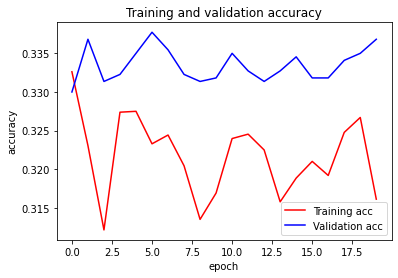

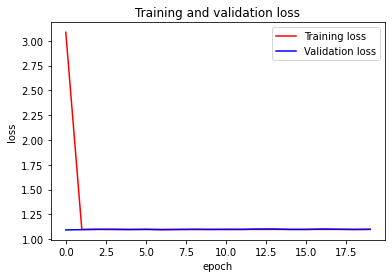

In [17]:
import matplotlib.pyplot as plt 
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [18]:
from keras.callbacks import *

earlstop=EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0,mode='auto',baseline=None)

model.fit_generator(train_generator, 
    steps_per_epoch = train_samples, 
    epochs = 20, 
    callbacks=[earlstop],
    validation_data = validation_generator, 
    validation_steps = 10)

Epoch 1/20
880/880 [==============================] - 71s 80ms/step - loss: 1.0988 - categorical_accuracy: 0.3234 - val_loss: 1.0920 - val_categorical_accuracy: 0.3100
Epoch 2/20
880/880 [==============================] - 71s 81ms/step - loss: 1.0988 - categorical_accuracy: 0.3257 - val_loss: 1.0972 - val_categorical_accuracy: 0.3700
Epoch 3/20
880/880 [==============================] - 72s 82ms/step - loss: 1.0988 - categorical_accuracy: 0.3241 - val_loss: 1.0991 - val_categorical_accuracy: 0.2700


In [19]:
from keras.models import load_model
model.save('my_model.h5')
del model

model = load_model('my_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
activation_1 (Activation)    (None, 149, 149, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 32)        4128      
_________________________________________________________________
activation_2 (Activation)    (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 35, 35, 64)       

In [20]:
pred = model.predict_generator(validation_generator,steps=100)